In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\\dataset\\mushrooms.csv")

In [3]:
df.shape

(8124, 23)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values in the data.

In [7]:
#checking for unique values
for i in df.columns:
    print(i,df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
#From the above uniqe values we can say that 'veil-type ' has only one category, so this can be dropped. 
df.drop('veil-type',axis=1,inplace=True)

In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
#All the feature are in categoral format. For further analysis, they can be converted into Numarical format using lable encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=pd.DataFrame(columns=df.columns)
for i in df.columns:
    df1[i]=le.fit_transform(df[i])

In [11]:
df1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [12]:
df1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Data Exploration

<AxesSubplot:xlabel='class', ylabel='count'>

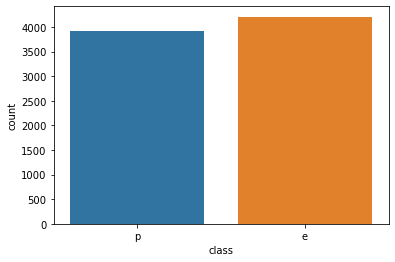

In [13]:
sns.countplot(x=df['class'],data=df)

The two classes are almost equally distributed.So, we can say that dataset is balanced.

In [14]:
df1.corr()['class'].sort_values()

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
Name: class, dtype: float64

([<matplotlib.axis.XTick at 0x214aaa03388>,
 [Text(0, 0, 'black'),
  Text(1, 0, 'brown'),
  Text(2, 0, 'gray'),
  Text(3, 0, 'pink'),
  Text(4, 0, 'white'),
  Text(5, 0, 'choclate'),
  Text(6, 0, 'purple'),
  Text(7, 0, 'red'),
  Text(8, 0, 'buff'),
  Text(9, 0, 'green'),
  Text(10, 0, 'yellow'),
  Text(11, 0, 'orange')])

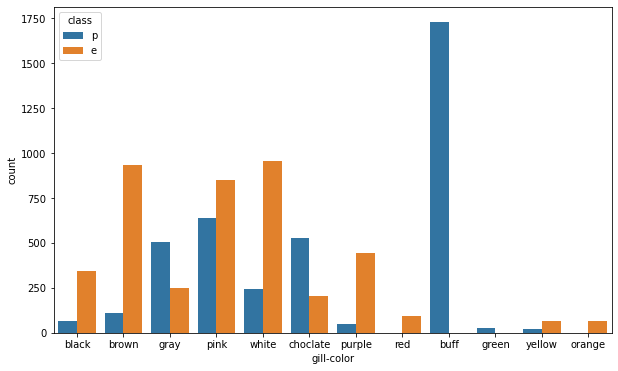

In [15]:
#Class vs gill color
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

plt.figure(figsize=(10,6))
sns.countplot(x=df['gill-color'],data=df,hue='class')
plt.xticks(range(0,12),['black','brown','gray','pink','white','choclate','purple','red','buff','green','yellow','orange'])


In [16]:
#From above plots, we can say that, red,buff,orange, and green colors are clearly classified. If color of mushroom is red,orange
# then it is edible. If it is buff or green, then poisonous

<AxesSubplot:xlabel='bruises', ylabel='count'>

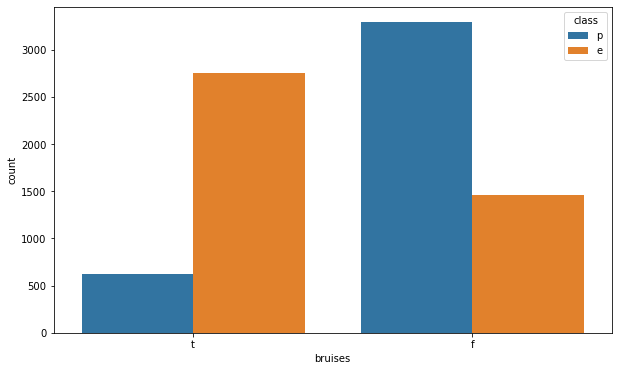

In [17]:
#class vs bruises
plt.figure(figsize=(10,6))
sns.countplot(x=df['bruises'],data=df,hue='class')

In [18]:
#We cannot draw any conclusions from this.

<AxesSubplot:xlabel='gill-size', ylabel='count'>

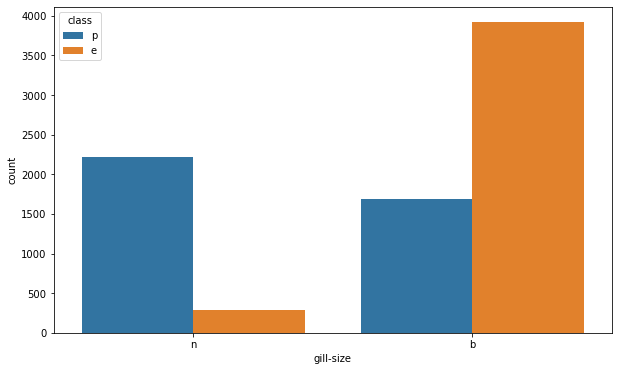

In [19]:
#class vs gill size
plt.figure(figsize=(10,6))
sns.countplot(x=df['gill-size'],data=df,hue='class')

In [20]:
#we cannot draw any conclusions from this.

C:\Users\hp\anaconda1\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


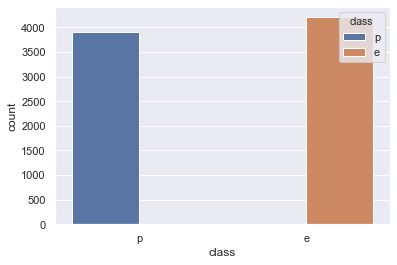

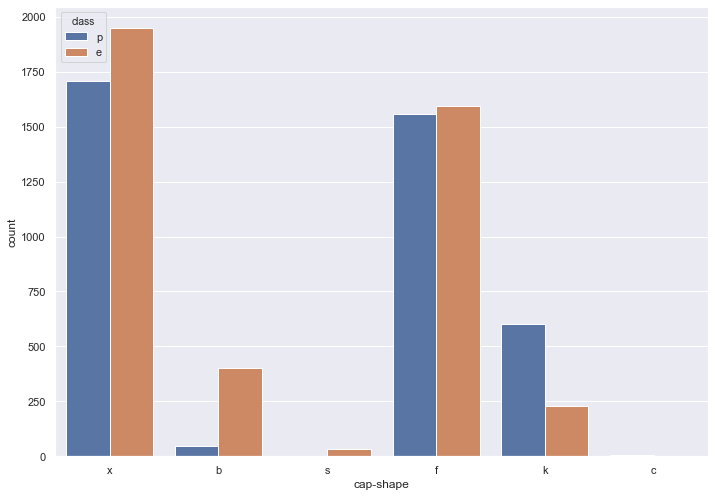

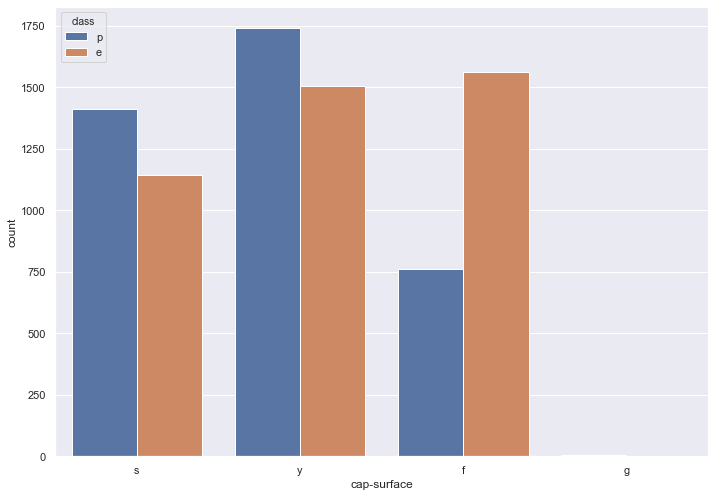

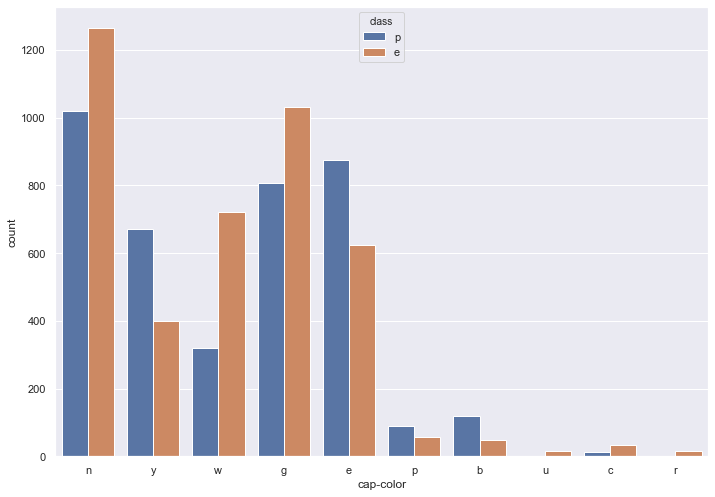

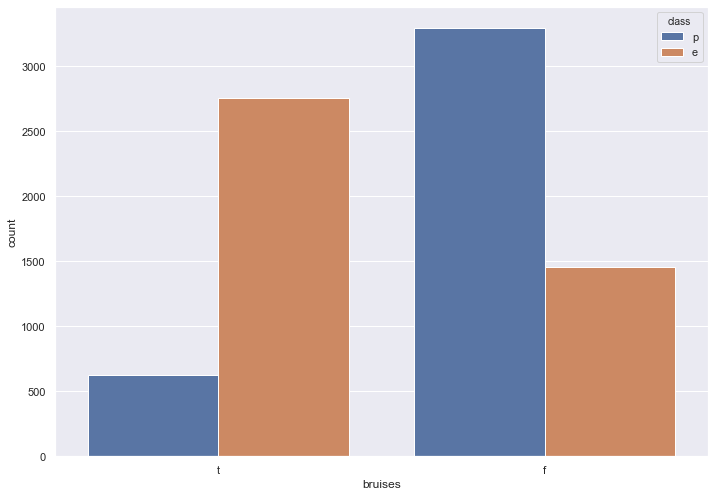

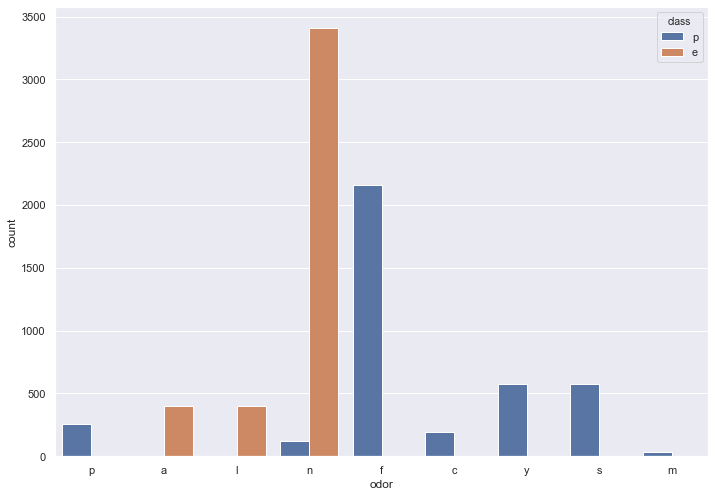

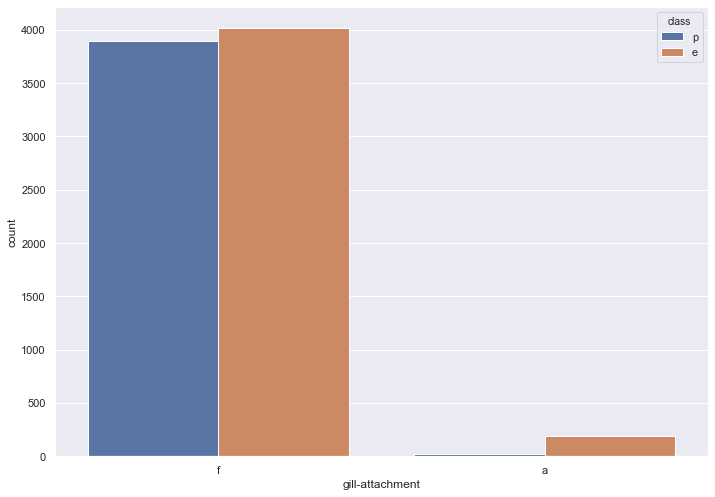

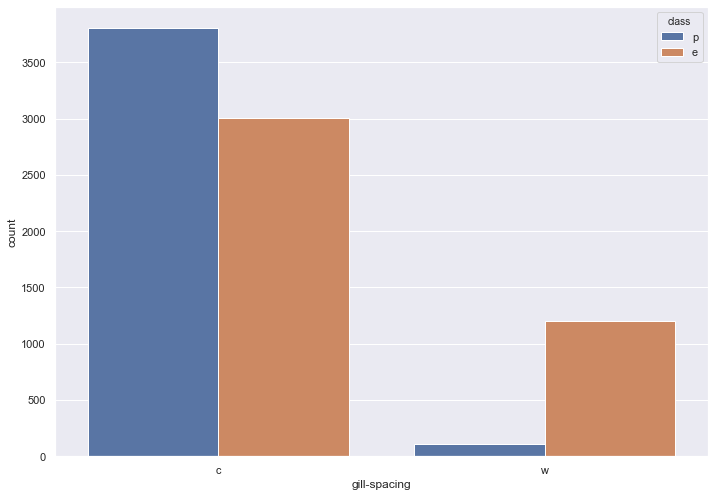

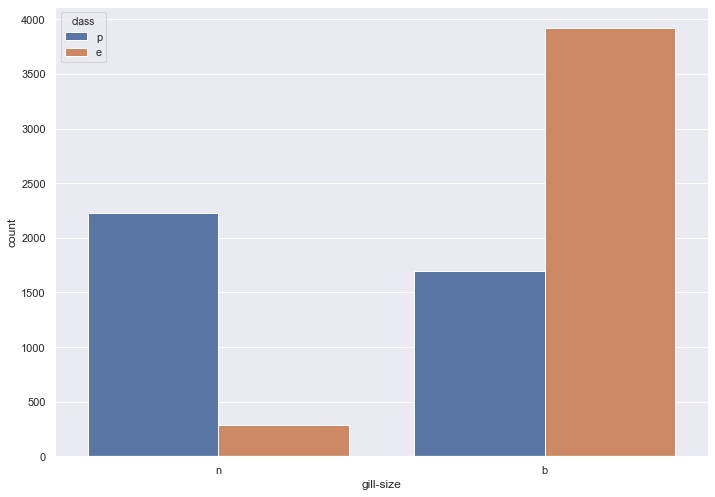

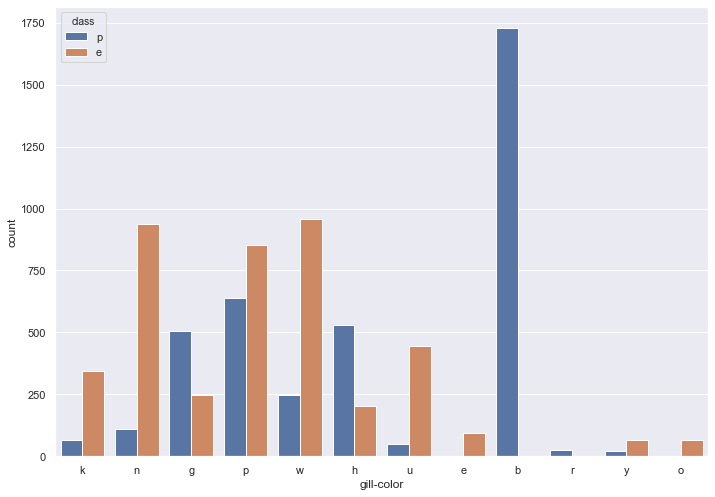

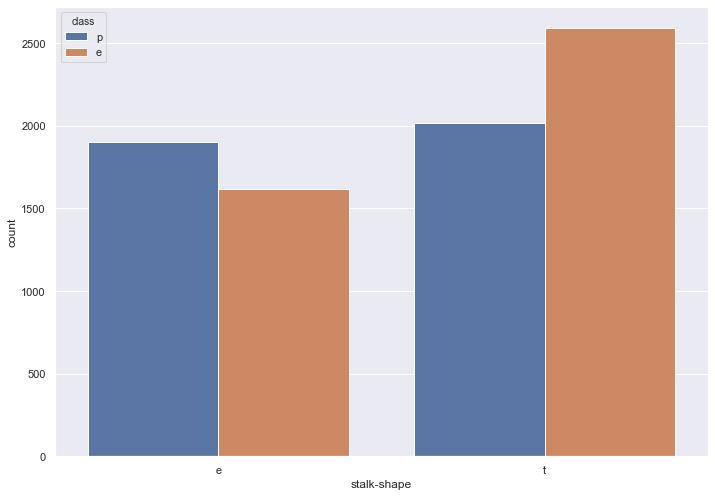

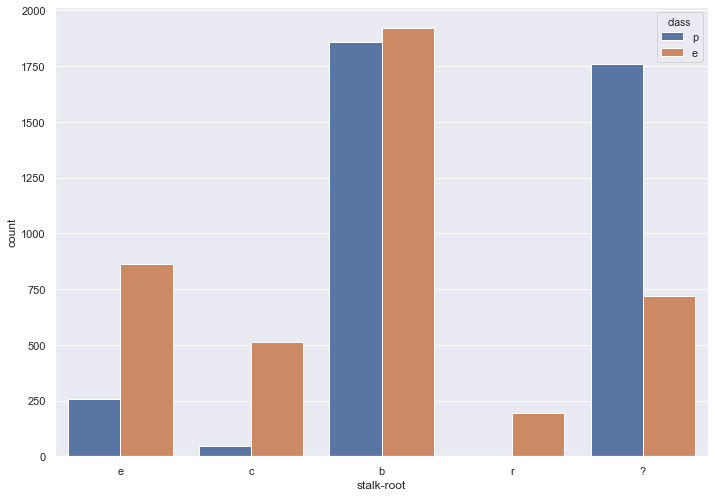

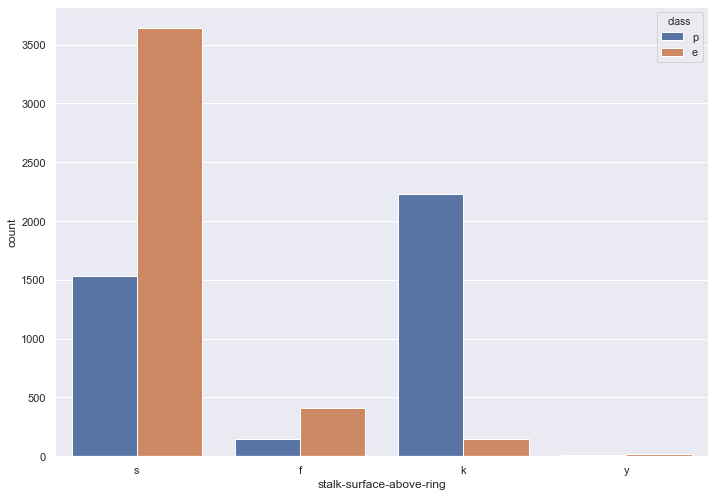

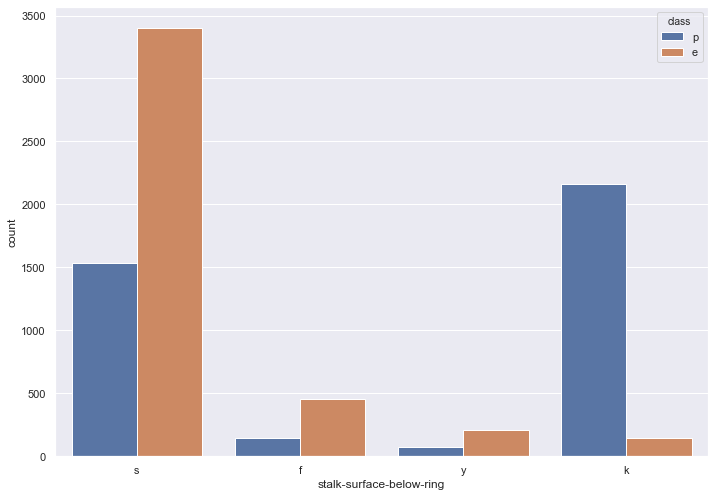

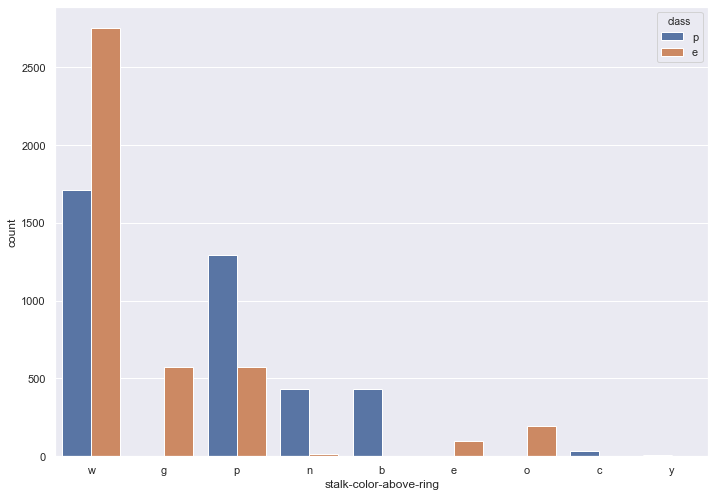

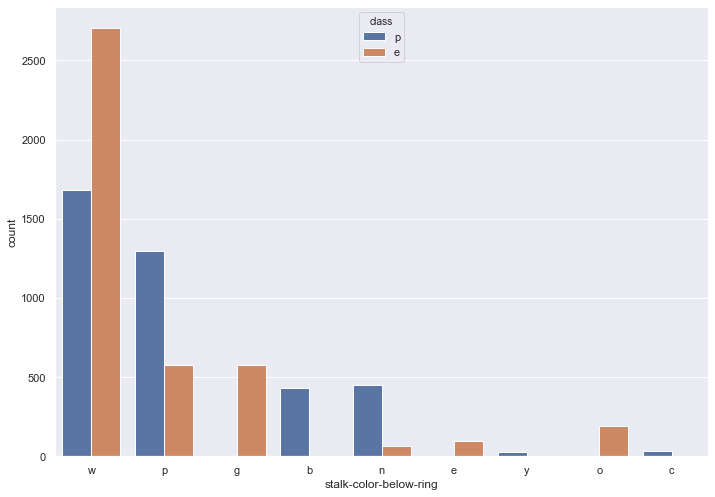

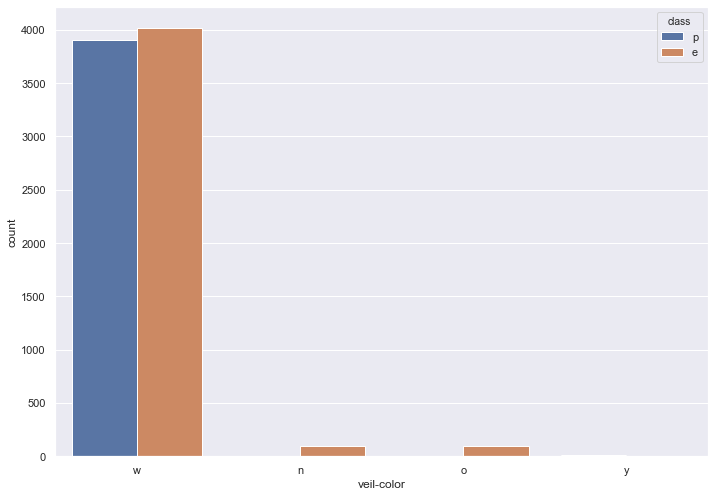

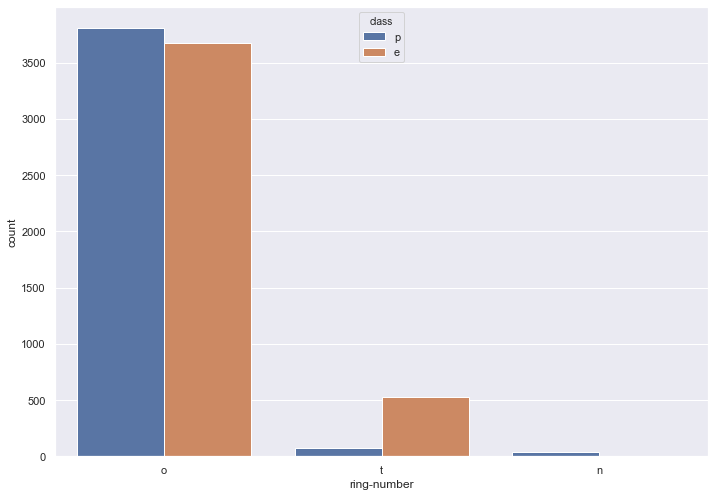

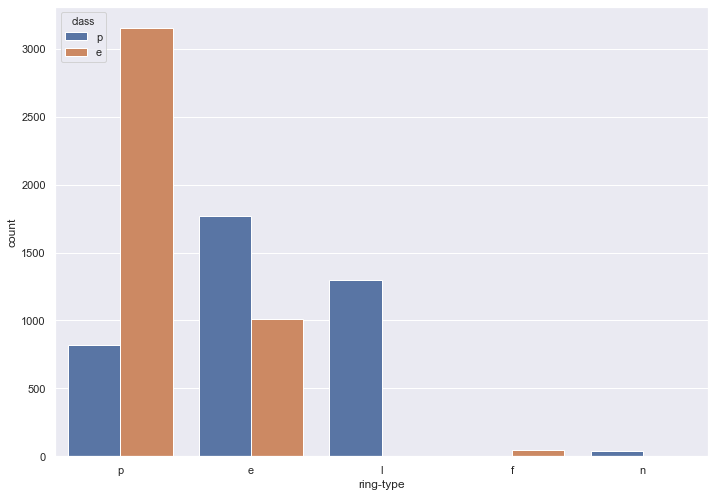

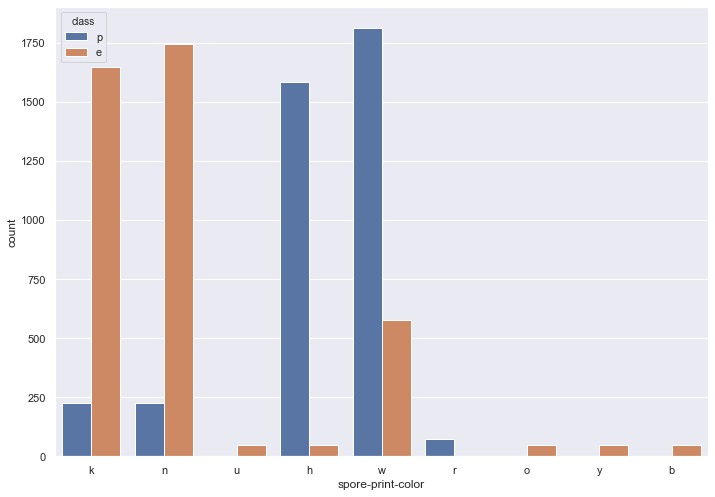

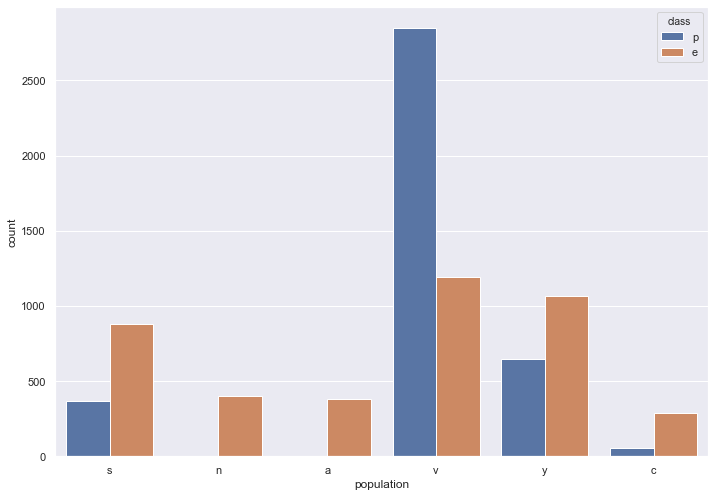

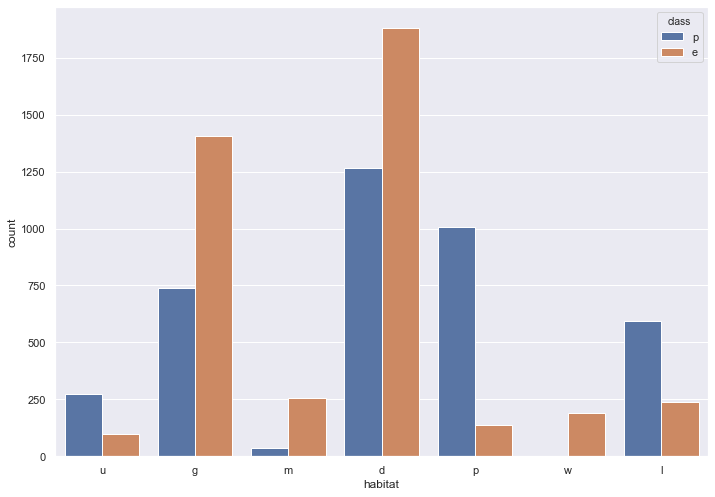

In [21]:
col=df.columns
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.countplot(x=df[col],data=df,hue='class')

<AxesSubplot:>

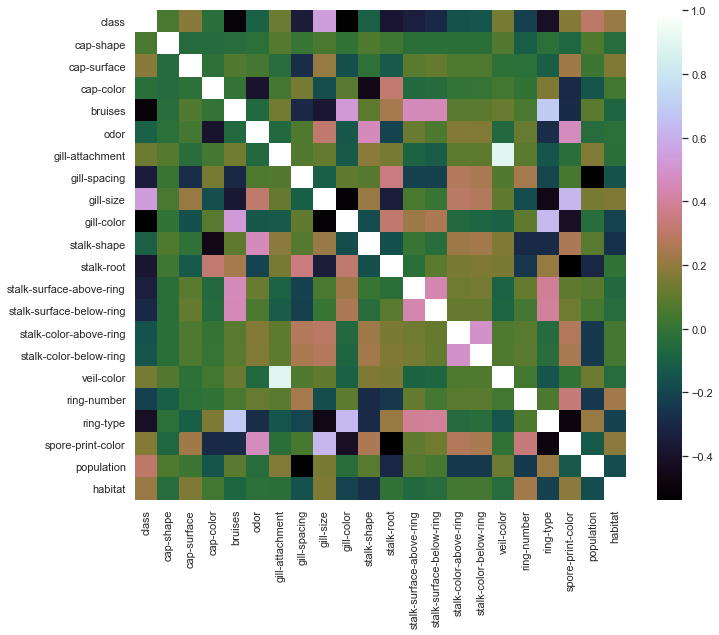

In [22]:
plt.figure(figsize=(11,9))

sns.heatmap(df1.corr(),cmap="cubehelix")

## modelling

In [23]:
#Normalizing the data

df_norm=(df1-df1.min())/(df1.max()-df1.min())

In [24]:
df_norm.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.666667,0.5,0.0,0.375,0.0,0.166667


In [25]:
y=df_norm['class']
x=df_norm.drop('class',axis=1)

In [26]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)
lm_pred=lm.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy score:",accuracy_score(y_test,lm_pred))
print(classification_report(y_test,lm_pred))

Accuracy score: 0.9417555373256767
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1246
         1.0       0.96      0.92      0.94      1192

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



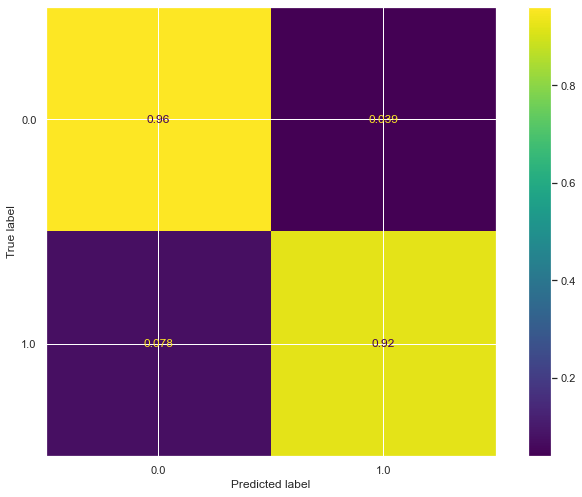

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lm,x_test,y_test,normalize='true')

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
dt_pred=model.predict(x_test)

In [32]:
print('classification_reprot',classification_report(y_test,dt_pred))

classification_reprot               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1246
         1.0       1.00      1.00      1.00      1192

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



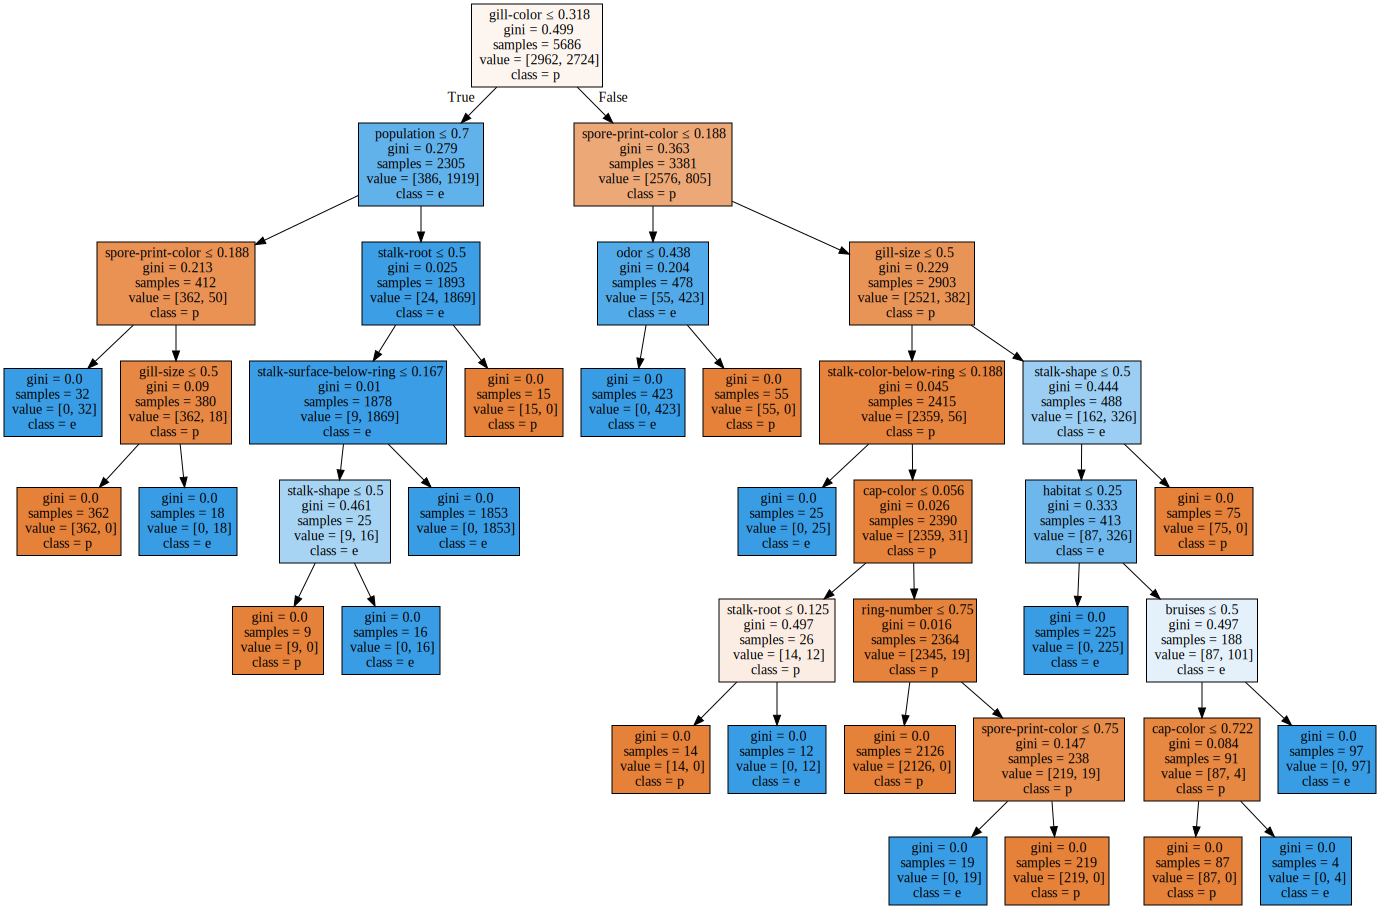

In [33]:
import graphviz
import sklearn.tree

dot_data=sklearn.tree.export_graphviz(model,out_file=None,
                                      feature_names = list(x.columns),class_names=df['class'], 
                                      filled=True,rounded=False,special_characters=True)
graph=graphviz.Source(dot_data)
graph

## Random Forest

In [34]:
#Random Forest model with default parameters
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred4=rf.predict(x_test)
print("accuracy rate with default parameters",accuracy_score(y_test,pred4))
print(classification_report(y_test,pred4))


accuracy rate with default parameters 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1246
         1.0       1.00      1.00      1.00      1192

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [35]:
from pprint import pprint
print("Default parameters are: \n")
pprint(rf.get_params())

Default parameters are: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [36]:
#From list of parameters availble, we select important parameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [37]:
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier()

#search for 100 combinations to find best parameters and 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rf_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [39]:
#Final model
rf_final=RandomForestClassifier(n_estimators=311,min_samples_split= 5,
                                min_samples_leaf= 1,
                                max_features= 'sqrt',
                                max_depth= 30,
                                bootstrap=True)
rf_final.fit(x_train,y_train)
rf_pred=rf_final.predict(x_test)

print("classification_report",classification_report(y_test,rf_pred))

classification_report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1246
         1.0       1.00      1.00      1.00      1192

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## KNN 

In [40]:
#Choosing k value

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())
    

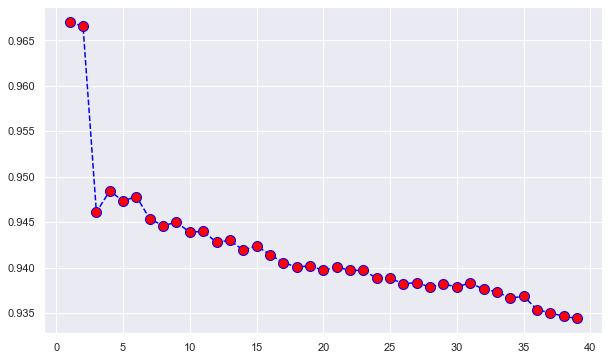

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [43]:
# We can take k value as 3. Because if we take 1 or 2, model get biased. If we take greater than 3, we are getting less accuracy
model3=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model3.fit(x_train,y_train)
kn_pred=model3.predict(x_test)
print("accuracy score:",accuracy_score(y_test,kn_pred))
knn_acc=accuracy_score(y_test,kn_pred)

accuracy score: 1.0


## SVM

In [44]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

sv_pred=svc.predict(x_test)
print("Classificaion report",classification_report(y_test,sv_pred))

Classificaion report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1246
         1.0       1.00      1.00      1.00      1192

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Hyper parameter tuning for better accuracy¶

In [45]:
print("Default parameters")
pprint(svc.get_params())

Default parameters
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [46]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid','linear']}  
  
grid = RandomizedSearchCV(SVC(), param_distributions = param_grid, 
                               n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1) 

grid.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'sigmoid', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [47]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}

In [48]:
#final model
svc1=SVC(kernel='rbf', gamma= 0.1, C=1000)
svc.fit(x_train,y_train)
sv_pred=svc.predict(x_test)
print("classification report",classification_report(y_test,sv_pred))
svm_acc=accuracy_score(y_test,sv_pred)

classification report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1246
         1.0       1.00      1.00      1.00      1192

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [49]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thr1=roc_curve(y_test,lm_pred,pos_label=1)
fpr2,tpr2,thr2=roc_curve(y_test,dt_pred,pos_label=1)
fpr3,tpr3,thr3=roc_curve(y_test,rf_pred,pos_label=1)
fpr4,tpr4,thr4=roc_curve(y_test,kn_pred,pos_label=1)
fpr5,tpr5,thr5=roc_curve(y_test,sv_pred,pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [50]:
from sklearn.metrics import roc_auc_score
auc_score1=roc_auc_score(y_test,lm_pred)
auc_score2=roc_auc_score(y_test,dt_pred)
auc_score3=roc_auc_score(y_test,rf_pred)
auc_score4=roc_auc_score(y_test,kn_pred)
auc_score5=roc_auc_score(y_test,sv_pred)


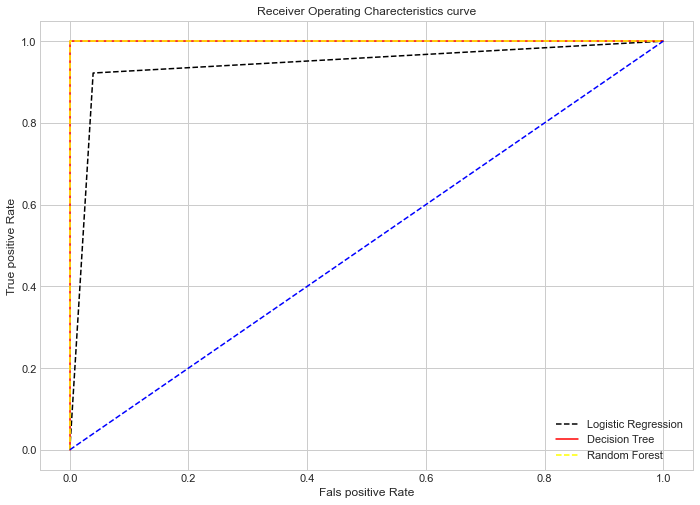

In [51]:
plt.style.use('seaborn-whitegrid')
plt.plot(fpr1,tpr1,linestyle='--',color='black',label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='-',color='red',label='Decision Tree')
plt.plot(fpr3,tpr3,linestyle='--',color='yellow',label="Random Forest")

plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')

plt.title("Receiver Operating Charecteristics curve")

plt.xlabel("Fals positive Rate")
plt.ylabel("True positive Rate")

plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'True positive Rate')

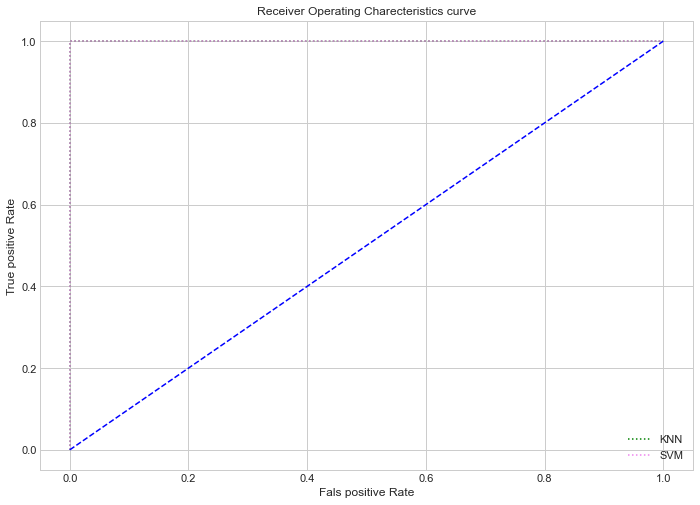

In [52]:
plt.style.use('seaborn-whitegrid')


plt.title("Receiver Operating Charecteristics curve")




plt.plot(fpr4,tpr4,linestyle=':',color='green',label="KNN")
plt.plot(fpr5,tpr5,linestyle=':',color='violet',label='SVM')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')

plt.legend(loc='best')

plt.xlabel("Fals positive Rate")
plt.ylabel("True positive Rate")

Text(0.5, 1.0, 'model vs accuracy comparision')

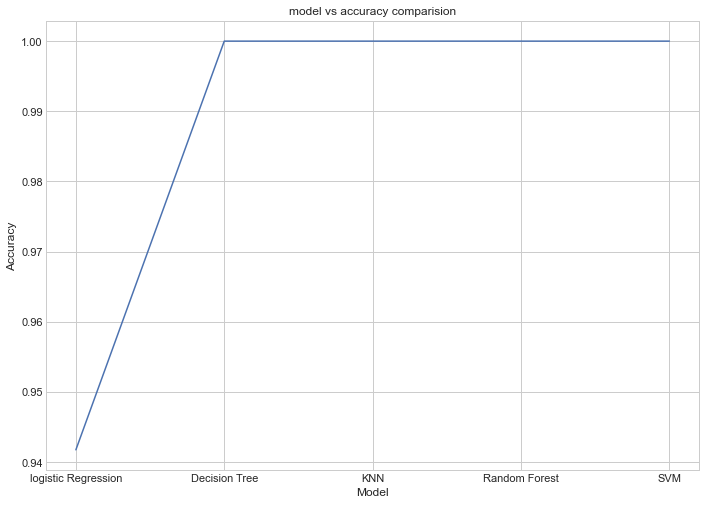

In [53]:
x=['logistic Regression','Decision Tree','KNN','Random Forest','SVM']

models=[lm_pred,dt_pred,rf_pred,kn_pred,sv_pred]

acc=[]
for i in range(0,len(models)):
    acc.append(accuracy_score(y_test,models[i]))

plt.plot(x,acc)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("model vs accuracy comparision")